# This notebook is to explore the features in the steam dataset

In [48]:
import pandas as pd

df = pd.read_csv('games-features-Craig.csv')
# df = pd.read_csv('games-features.csv')

print("There are",len(df),"observations and",len(df.columns),"features in the dataset.")
print()
print("The features are",list(df.columns))

df.head()

There are 13357 observations and 78 features in the dataset.

The features are ['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate', 'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic', 'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount', 'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance', 'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport', 'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail', 'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin', 'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec', 'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual', 'GenreIsStrategy', 'GenreIs

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


In [294]:
len(df)

13357

In [298]:
df_critic.head()

,Metacritic,PriceInitial,DLCCount,RequiredAge
0,88,9.99,0,0
1,0,4.99,0,0
2,79,4.99,0,0
3,0,4.99,0,0
4,0,4.99,0,0


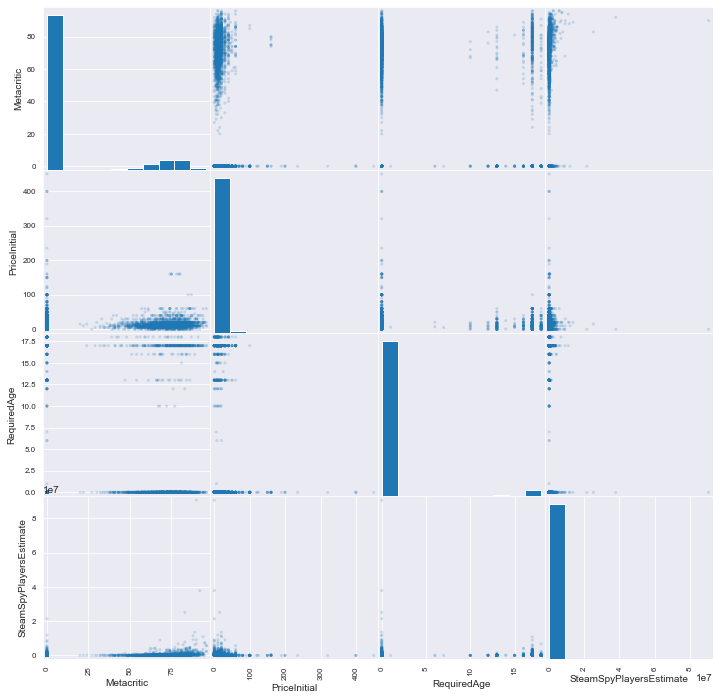

In [304]:
df_critic=df[['Metacritic','PriceInitial','RequiredAge','SteamSpyPlayersEstimate']]

# df_critic=df_critic[df_critic['Metacritic']!=0]

pd.plotting.scatter_matrix(df_critic,alpha=0.2,figsize=(12,12),grid=False)
plt.show()

In [330]:
df['metacritic_normed']=(df.Metacritic-df.Metacritic.min())/(df.Metacritic.max()-df.Metacritic.min())
df['owners_normed']=(df['SteamSpyOwners']-df['SteamSpyOwners'].min())/(df['SteamSpyOwners'].max()-df['SteamSpyOwners'].min())

In [331]:
df[['metacritic_normed','owners_normed']].head()

,metacritic_normed,owners_normed
0,0.916667,0.143717
1,0.000000,0.059536
2,0.822917,0.084037
3,0.000000,0.082690
4,0.000000,0.059540


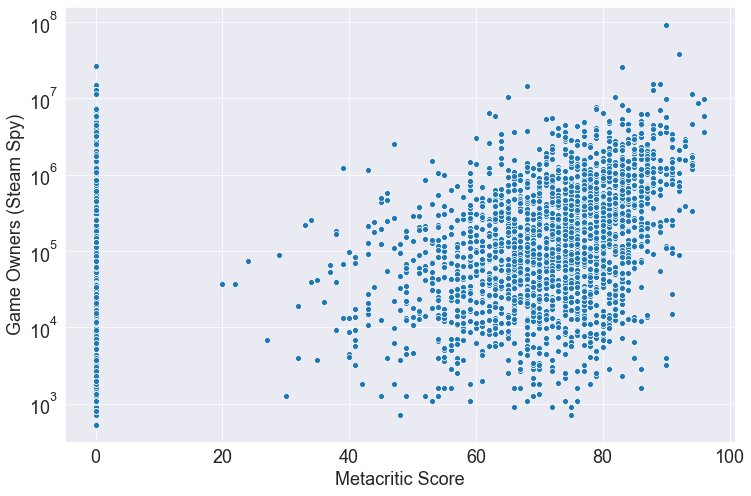

In [386]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Metacritic',y='SteamSpyOwners',data=df)

plt.xlabel("Metacritic Score",fontsize=18)
plt.ylabel("Game Owners (Steam Spy)",fontsize=18)

# plt.legend(fontsize=14)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(10**2.5,10**8.2)
plt.savefig("OwnersVsCritic.jpg")

# plt.show()

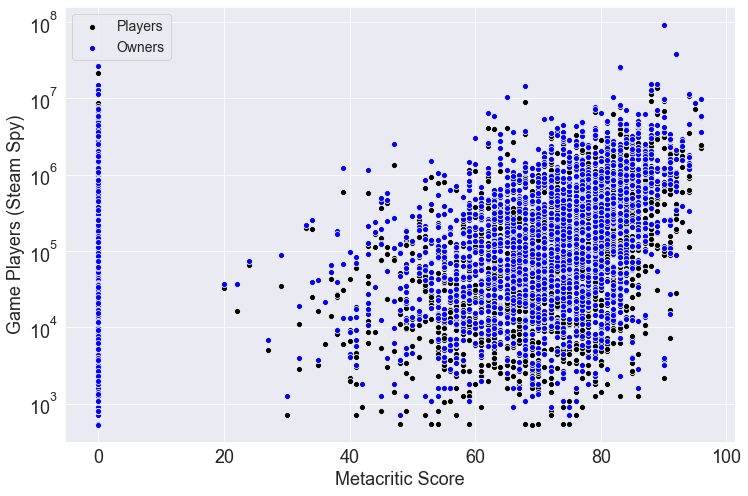

In [394]:
f, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Metacritic',y='SteamSpyPlayersEstimate',data=df,color='k',label='Players')
sns.scatterplot(x='Metacritic',y='SteamSpyOwners',data=df,color='b',label='Owners')

plt.xlabel("Metacritic Score",fontsize=18)
plt.ylabel("Game Players (Steam Spy)",fontsize=18)

plt.legend(fontsize=14,loc='best')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.yscale('log')
plt.ylim(10**2.5,10**8.2)
# plt.savefig("OwnersVsCritic.jpg")

plt.show()

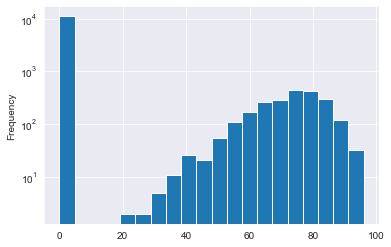

In [349]:
df['Metacritic'].plot.hist(bins=20)
plt.yscale('log')

In [58]:
cols=['QueryName','SteamSpyOwners', 'SteamSpyOwnersVariance', 'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance']
df[cols].head(10).drop_duplicates()

,QueryName,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance
0,Counter-Strike,13033334,92789,9140731,78136
1,Team Fortress Classic,5399140,60368,753627,22699
2,Day of Defeat,7621102,71499,1709740,34145
3,Deathmatch Classic,7498965,70936,789676,23235
4,Half-Life: Opposing Force,5399499,60370,705741,21968
5,Ricochet,7488563,70888,843481,24011
6,Half-Life,5927504,63206,2268772,39303
7,Counter-Strike: Condition Zero,10489261,83543,4127910,52878
9,Half-Life: Blue Shift,5368650,60199,662517,21286


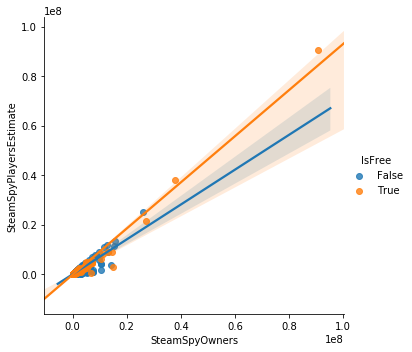

In [49]:
import seaborn as sns

sns.lmplot(x='SteamSpyOwners',y='SteamSpyPlayersEstimate',hue='IsFree',data=df)

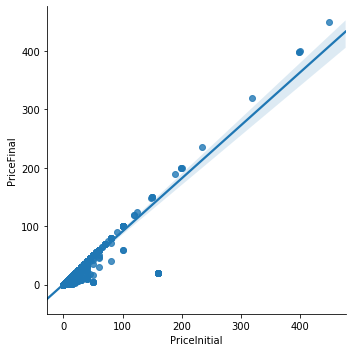

In [175]:
sns.lmplot(x='PriceInitial',y='PriceFinal',data=df)

In [176]:
df[df.PriceFinal>200]

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
3222,278210,278210,Vegas Pro 13 Edit - Steam Powered,VEGAS Pro 13 Edit - Steam Powered,Nov 2 2015,0,0,1,0,0,...,,,English French German Spanish Japanese,http://www.vegascreativesoftware.com/us/vegas-...,Minimum:OS: 64-bit Microsoft(r) Windows 7 Wind...,Recommended:OS: 64-bit Microsoft(r) Windows 7 ...,,,,
4030,304970,304970,SolidFace Pro 2015,SolidFace Parametric CAD Modeler 2D/3D,Dec 22 2014,0,0,2,0,0,...,,,English* Portuguese-Brazil**languages with ful...,http://www.solidface.com/,Minimum:OS: Support Windows (r) XP/Vista/7/8Pr...,Recommended:OS: Support Windows (r) XP/Vista/7...,,,,
5017,335930,335930,Atavism 2 On Premises,Atavism MMO Creator,Jan 20 2015,0,0,1,0,0,...,Atavism Online Neojac Entertainment Neos Land ...,,English**languages with full audio support,http://www.atavismonline.com/,Minimum:OS: Windows XP SP2+Memory: 2 GB RAMDir...,Recommended:OS: Windows 7Processor: Intel i5Me...,,,Minimum:OS: Mac OS X 10.6+Memory: 2 GB RAMNetw...,Recommended:OS: Mac OS X 10.6+Memory: 3 GB RAM...
6757,377350,377350,ChessBase 13 Pro,ChessBase 13 Pro,Aug 4 2016,0,0,1,0,0,...,(c) ChessBase GmbH,,English**languages with full audio support,None,Minimum:OS: Windows Vista(r) Windows(r) 7 Wind...,,,,,
12271,528200,528200,VEGAS Pro 14 Edit Steam Edition,VEGAS Pro 14 Edit Steam Edition,Sep 30 2016,0,0,1,0,0,...,Copyright (c) MAGIX Software GmbH 2016. VEGAS ...,,English French German Spanish,http://www.vegascreativesoftware.com,Minimum:OS: Windows 7 | 8 | 8.1 | 10 (64-bit)P...,Recommended:OS: Windows 7 | 8 | 8.1 | 10 (64-b...,,,,
12838,528100,528100,Marvelous Designer 6 For Steam,Marvelous Designer 6 For Steam,Nov 23 2016,0,0,1,0,0,...,,,English Simplified Chinese Korean,http://www.marvelousdesigner.com/,Minimum:OS: Microsoft Windows Vista (64bit)Pro...,Recommended:OS: Microsoft Windows Vista/7/8/8....,,,,


In [168]:
import numpy as np

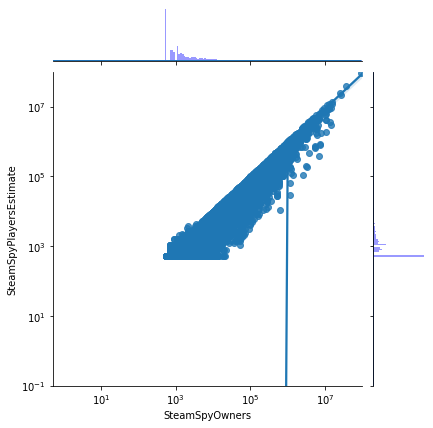

In [173]:
mybins=np.logspace(0, np.log(100), 100)

g = sns.JointGrid(x='SteamSpyOwners', y='SteamSpyPlayersEstimate', data=df, xlim=[.5, 100000000],
                  ylim=[.1, 100000000])
g.plot_marginals(sns.distplot, color='blue', bins=mybins)
g = g.plot(sns.regplot, sns.distplot)
# g = g.annotate(stats.pearsonr)

ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')

g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')

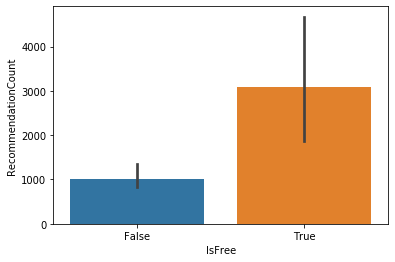

In [35]:
sns.barplot(x='IsFree',y='RecommendationCount',data=df);

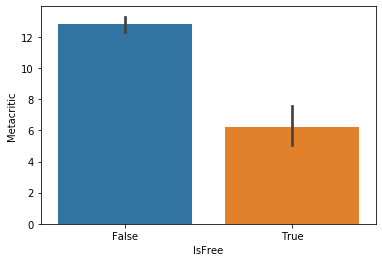

In [36]:
sns.barplot(x='IsFree',y='Metacritic',data=df);

### Try the kaggle dataset

In [177]:
import pandas as pd

df_kaggle = pd.read_csv('steam_games.csv')
# df = pd.read_csv('games-features.csv')

print("There are",len(df_kaggle),"observations and",len(df_kaggle.columns),"features in the dataset.")
print()
print("The features are",list(df_kaggle.columns))

df_kaggle.head()

There are 40833 observations and 20 features in the dataset.

The features are ['url', 'types', 'name', 'desc_snippet', 'recent_reviews', 'all_reviews', 'release_date', 'developer', 'publisher', 'popular_tags', 'game_details', 'languages', 'achievements', 'genre', 'game_description', 'mature_content', 'minimum_requirements', 'recommended_requirements', 'original_price', 'discount_price']


,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


# Time series data from Steam Charts

In [271]:
avg_player = pd.read_csv('../Steam Charts/avg_player.csv')
print(avg_player.shape)
avg_player.head()

(7831, 109)


,real_id,name,Last 30 Days,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
0,10,Counter-Strike,11721.23,12426.28,12311.34,12091.33,13094.31,12239.53,11278.70,10320.58,...,21204.46,24139.15,28378.42,34814.47,31996.07,29669.97,28836.29,29432.56,33095.80,34139.20
1,20,Team Fortress Classic,56.94,57.63,61.19,68.31,79.08,74.00,70.45,69.89,...,73.58,77.73,82.32,89.00,87.79,78.58,77.51,83.83,93.03,98.17
2,30,Day of Defeat,101.50,103.37,105.42,112.93,117.04,112.77,109.85,104.98,...,217.90,297.55,318.41,319.62,318.08,303.99,297.00,289.59,304.47,331.84
3,40,Deathmatch Classic,2.83,2.95,4.42,4.90,4.41,4.78,6.74,7.45,...,4.64,5.78,7.11,6.91,6.72,6.18,5.56,6.26,7.41,8.61
4,50,Half-Life: Opposing Force,84.70,83.77,89.22,105.72,128.28,111.27,93.25,78.46,...,43.04,39.92,43.15,50.20,47.06,38.63,41.30,56.26,55.77,79.06


In [272]:
avg_player.drop_duplicates(inplace=True)

avg_player.sort_values('Last 30 Days',ascending=False,inplace=True)

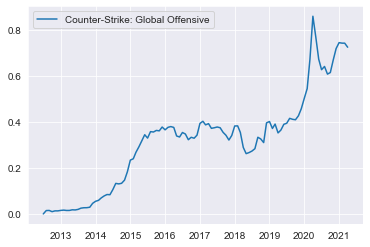

In [404]:
plt.plot(pd.to_datetime(avg_player.columns[3:])
         ,avg_player.iloc[0][3:]/(1e6)
         ,label=avg_player.iloc[0]['name'])
plt.legend()
plt.show()

In [402]:
pd.DataFrame({'date':pd.to_datetime(avg_player.columns[3:]),'players':avg_player.iloc[0][3:]/(1e6)})

,date,players
April 2021,2021-04-01,0.723347
March 2021,2021-03-01,0.740928
February 2021,2021-02-01,0.741013
January 2021,2021-01-01,0.74321
December 2020,2020-12-01,0.717804
...,...,...
November 2012,2012-11-01,0.014134
October 2012,2012-10-01,0.010739
September 2012,2012-09-01,0.016001
August 2012,2012-08-01,0.015475


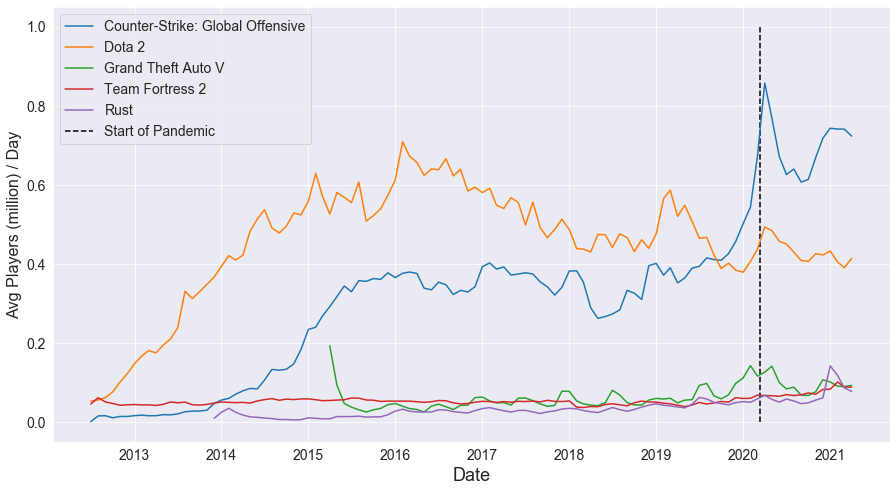

In [397]:
plt.figure(figsize = (15,8))

for i in range(5):
    plt.plot(pd.to_datetime(avg_player.columns[3:])
             ,avg_player.iloc[i][3:]/(1e6)
             ,label=avg_player.iloc[i]['name'])

plt.vlines(pd.to_datetime('March 11, 2020')
         ,0,1,colors='k',linestyles='dashed'
         ,label='Start of Pandemic')
    
plt.xlabel("Date",fontsize=18)
plt.ylabel("Avg Players (million) / Day",fontsize=16)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()
# # plt.legend(fontsize=14,bbox_to_anchor=(1.01, 1), loc='upper left')
# # plt.yscale('log')
# plt.savefig("Top-5.png")

In [273]:
avg_player_sub=avg_player.set_index('name')

avg_player_sub.drop(columns=['real_id','Last 30 Days'],inplace=True)

avg_player_sub.head()

,April 2021,March 2021,February 2021,January 2021,December 2020,November 2020,October 2020,September 2020,August 2020,July 2020,...,April 2013,March 2013,February 2013,January 2013,December 2012,November 2012,October 2012,September 2012,August 2012,July 2012
name,,,,,,,,,,,,,,,,,,,,,
Counter-Strike: Global Offensive,723346.52,740927.82,741013.24,743209.66,717803.75,668754.58,613666.69,606850.32,639957.66,625900.81,...,16006.00,15959.89,17372.73,16164.22,14079.39,14134.10,10739.48,16000.75,15475.39,932.57
Dota 2,413784.97,390412.76,404832.13,432671.65,422552.32,425904.83,406361.36,408609.78,429717.12,450213.99,...,174835.73,180878.90,166972.97,147748.14,121924.42,101077.43,75965.44,61867.68,55768.61,52721.05
Grand Theft Auto V,92647.80,89792.84,90647.64,101250.59,106914.27,76718.34,67193.03,68047.03,88398.36,83654.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team Fortress 2,88187.00,88703.56,101230.91,83148.17,82423.51,70304.79,73594.08,68866.24,66943.58,69301.89,...,41942.51,43336.20,43210.75,44255.06,43623.98,42498.53,46978.70,50699.07,61561.37,45566.90
Rust,77590.25,86369.82,117742.27,142117.25,61171.65,55408.03,48550.80,46430.53,53287.65,58238.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
pd.to_datetime('March 11, 2020')

Timestamp('2020-03-11 00:00:00')

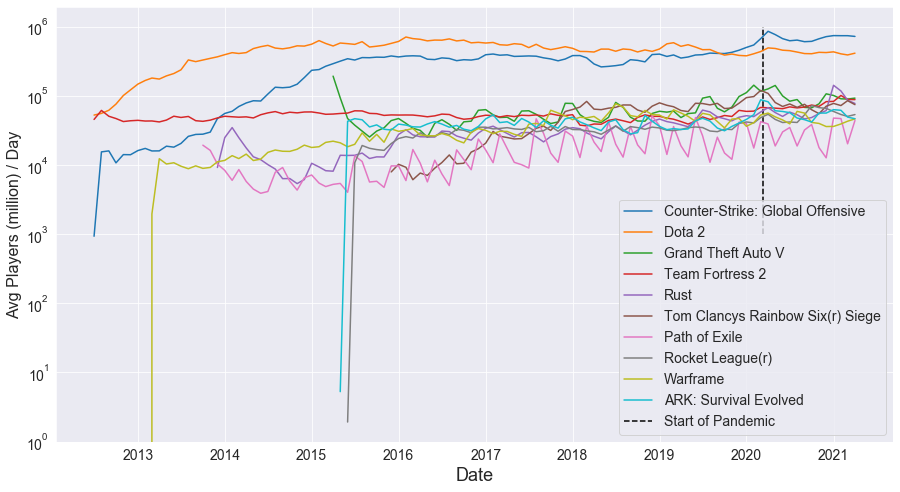

In [308]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

sns.set_style("darkgrid")

plt.figure(figsize = (15,8))

for i in range(10):
    plt.plot(pd.to_datetime(avg_player_sub.columns)
             ,avg_player_sub.iloc[i]
             ,label=avg_player_sub.index[i])

plt.vlines(pd.to_datetime('March 11, 2020')
         ,1e3,1e6,colors='k',linestyles='dashed'
         ,label='Start of Pandemic')
    
plt.xlabel("Date",fontsize=18)
plt.ylabel("Avg Players (million) / Day",fontsize=16)

plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
# plt.savefig("Top-5.jpg")

plt.show()